In [39]:
pip install scikit-learn


                                              0.0/9.2 MB ? eta -:--:--
     -                                        0.3/9.2 MB 10.6 MB/s eta 0:00:01
     --                                       0.6/9.2 MB 5.4 MB/s eta 0:00:02
     ---                                      0.7/9.2 MB 4.7 MB/s eta 0:00:02
     ----                                     1.0/9.2 MB 4.6 MB/s eta 0:00:02
     ----                                     1.1/9.2 MB 4.5 MB/s eta 0:00:02
     -----                                    1.3/9.2 MB 4.3 MB/s eta 0:00:02
     -----                                    1.4/9.2 MB 4.2 MB/s eta 0:00:02
     -----                                    1.4/9.2 MB 4.2 MB/s eta 0:00:02
     ------                                   1.4/9.2 MB 3.2 MB/s eta 0:00:03
     ------                                   1.5/9.2 MB 3.0 MB/s eta 0:00:03
     ------                                   1.5/9.2 MB 2.8 MB/s eta 0:00:03
     ------                                   1.5/9.2 MB 2.7 MB/s eta


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Sankalp\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [7]:
df = pd.read_csv("D:\sales\sales prediction\Advertising.csv")
df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [8]:
df = df.drop(columns="Unnamed: 0", axis=1)

In [9]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.shape

(200, 4)

In [12]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


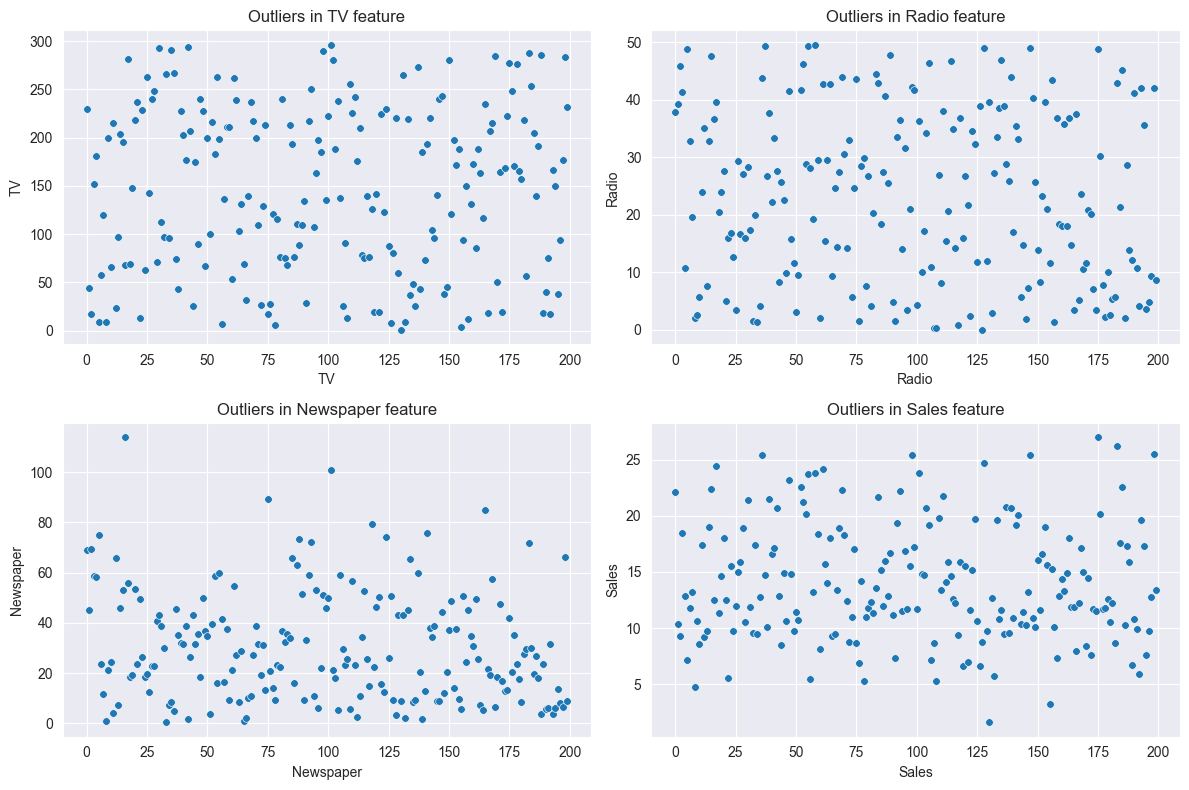

In [19]:
plt.figure(figsize=(12, 8))

columns = {0: "TV", 1: "Radio", 2: "Newspaper", 3: "Sales"}

for plot, col_name in columns.items():
    plt.subplot(2, 2, plot + 1)
    sns.scatterplot(data=df[col_name],palette="pastel" ,s=30)
    plt.xlabel(col_name)
    plt.title("Outliers in {} feature".format(col_name))

plt.tight_layout()
plt.show()

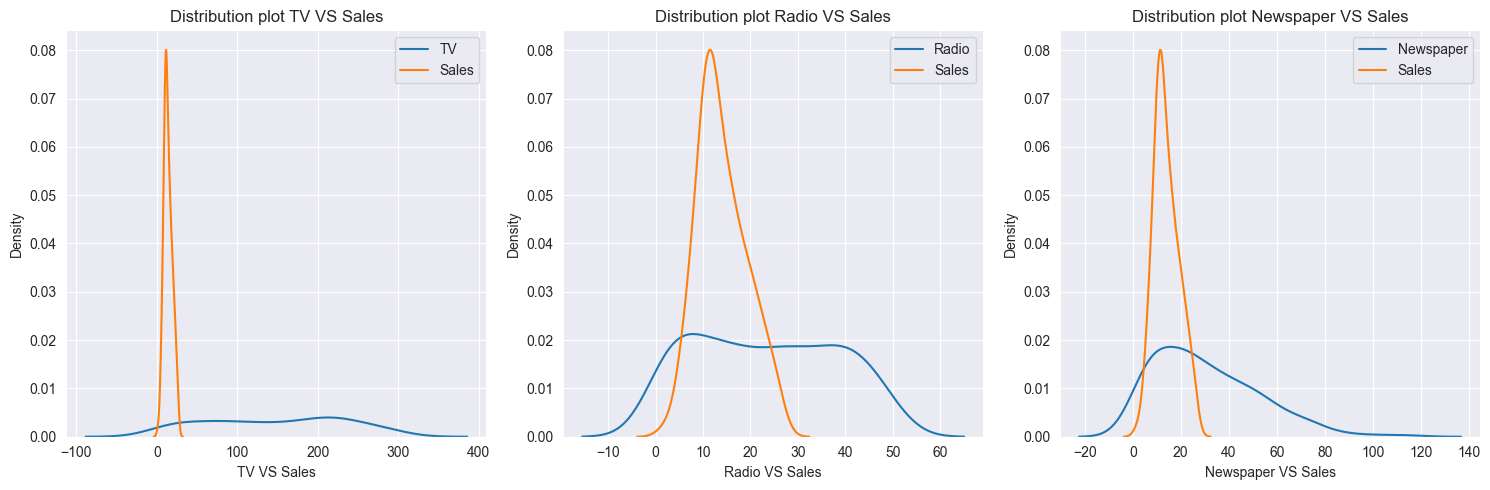

In [20]:
plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.distplot(x=df[col_name],hist=False, label= col_name)
    sns.distplot(x=df["Sales"],hist = False,label= "Sales")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Distribution plot {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

In [21]:
df.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


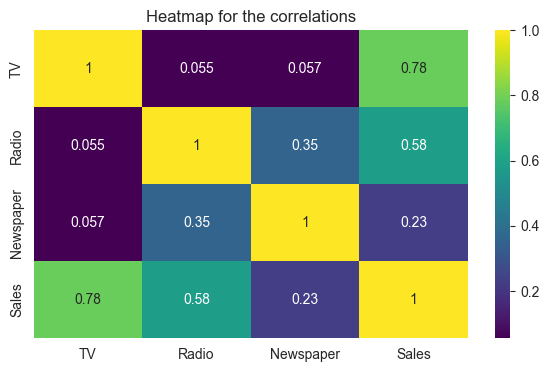

In [24]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.title("Heatmap for the correlations")
plt.show()

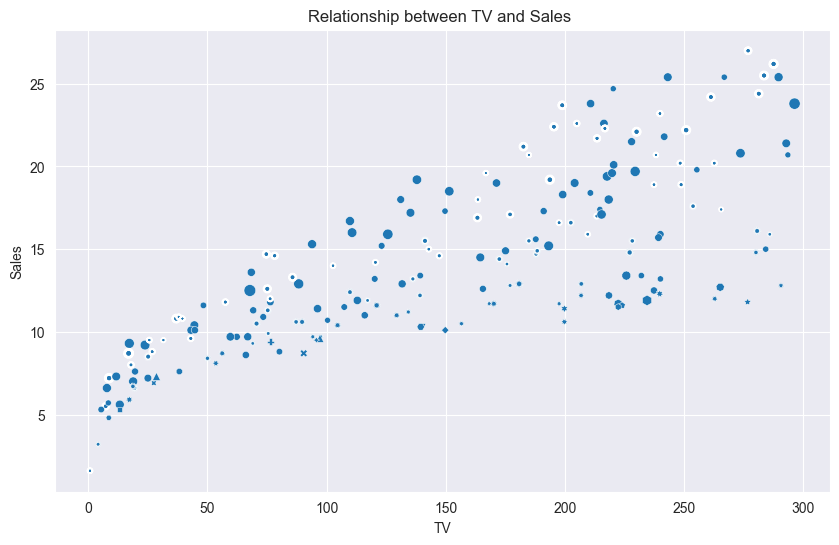

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="TV",y="Sales",style="Radio",size="Newspaper",palette="pastel",legend=False, s=50)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Relationship between TV and Sales ")
plt.show()

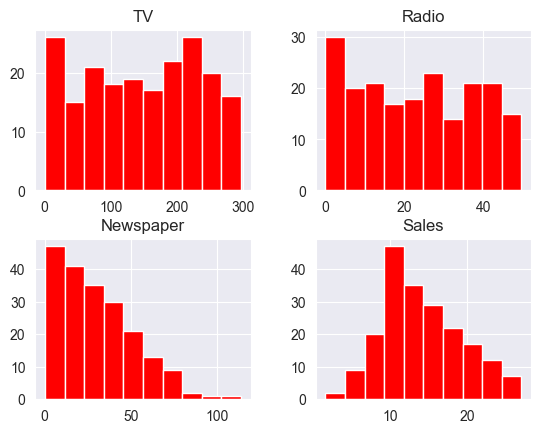

In [54]:
df.hist(color="Red")
plt.show()

In [30]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [32]:
X = df.drop(columns="Sales",axis=1)
y=df["Sales"]

In [41]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler

le = LabelEncoder()
y= le.fit_transform(y)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
scaler = MinMaxScaler()
scaler.fit(X_train,y_train)

MinMaxScaler()

In [44]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso

models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge())
]

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
tv = float(input("Enter the TV value: "))
radio = float(input("Enter the Radio value: "))
news = float(input("Enter the Newspaper value: "))

new_data = pd.DataFrame({
    "TV": [tv],
    "Radio": [radio],
    "Newspaper": [news]
})

new_pred_scaled = scaler.transform(new_data)
print("-------------------------------------")
new_pred = lr.predict(new_pred_scaled)
print("Predicted Sales : {}".format(abs(new_pred)))


Enter the TV value: 70
Enter the Radio value: 50
Enter the Newspaper value: 40
-------------------------------------
Predicted Sales : [9.40146022]


In [50]:
rr = Ridge()
rr.fit(X_train, y_train)

Ridge()

In [51]:
tv = float(input("Enter the TV value: "))
radio = float(input("Enter the Radio value: "))
news = float(input("Enter the Newspaper value: "))

new_data = pd.DataFrame({
    "TV": [tv],
    "Radio": [radio],
    "Newspaper": [news]
})

new_pred_scaled = scaler.transform(new_data)
print("-------------------------------------")
new_pred = rr.predict(new_pred_scaled)
print("Predicted Sales : {}".format(abs(new_pred)))

Enter the TV value: 50
Enter the Radio value: 70
Enter the Newspaper value: 70
-------------------------------------
Predicted Sales : [8.95222976]
